In [13]:
# https://pypi.org/project/coinmetrics-api-client/
from coinmetrics.api_client import CoinMetricsClient

API_KEY = 'INSERT_API_KEY'

# Community API:
client = CoinMetricsClient(API_KEY)

In [14]:
# The price of an asset quoted in U.S. dollars using a framework to select high quality constituent markets and a methodology that is resistant manipulation.
metrics = ['ReferenceRate']
assets = ['usdt','usdc','busd','usdp','frax','dai','tusd','tusd', 'usdd']

In [15]:
def fetch_data (assets, metrics, start_time, end_time, frequency):
    df = client.get_asset_metrics(
        assets = assets,
        metrics = metrics,
        start_time = start_time,
        end_time = end_time,
        frequency=frequency
    ).to_dataframe()
    
    return df

In [16]:
import pandas as pd

In [17]:
frames = []

for asset in assets:
    data = fetch_data([asset], metrics,'2021-05-06','2022-05-08','1d')
    data['Asset'] = asset
    frames.append(data)
    
result = pd.concat(frames)

Error found for the query: 
 https://api.coinmetrics.io/v4/timeseries/asset-metrics?api_key=INSERT_API_KEY&assets=usdt&metrics=ReferenceRate&frequency=1h&paging_from=start&start_time=2021-05-06&end_time=2022-05-08&next_page_token=0.MjAyMS0wOC0xOFQwMzowMDowMFo
Error details: {'type': 'too_many_requests', 'message': "There have been too many calls to the API or endpoint. Wait a bit and try again. For more info, please refer to 'X-RateLimit-*' response headers and API documentation: https://docs.coinmetrics.io/api."}


HTTPError: 429 Client Error: Too Many Requests for url: https://api.coinmetrics.io/v4/timeseries/asset-metrics?api_key=INSERT_API_KEY&assets=usdt&metrics=ReferenceRate&frequency=1h&paging_from=start&start_time=2021-05-06&end_time=2022-05-08&next_page_token=0.MjAyMS0wOC0xOFQwMzowMDowMFo

In [ ]:
# Remove timezone from DataFrame for excel export
result['time'] = result['time'].dt.tz_localize(None)

result.to_excel('stable_coin_hourly_2021-2022.xlsx')

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

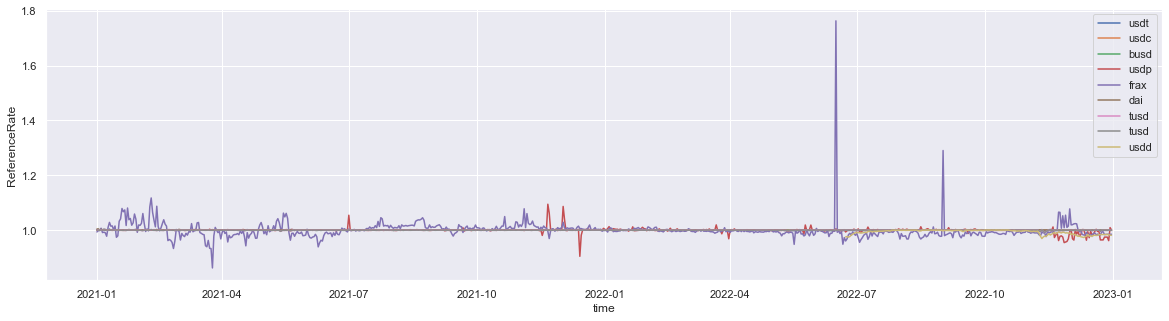

In [10]:
plt.figure(figsize=(20,5))
for frame in frames:
    sns.lineplot(data = frame, x="time", y="ReferenceRate", label = frame['Asset'][0])
    
plt.show()

In [11]:
'''
    USDT (Tether) - Fiat Backed
    USDC (USD Coin) - Fiat Backed
    BUSD (Binance USD) - Fiat Backed
    USDP (Pax Dollar) - Fiat Backed
    FRAX - Algorithmic via FXS & USDC
    USDD - Algo
    DAI (MakerDAO) - Crypto Backed
    TUSD (TrueUSD) - Fiat Backed
'''

abs_peg_diff = {}

for frame in frames:
    diff = 0
    for x in frame['ReferenceRate']:
        diff += abs(1 - x)
        
    abs_peg_diff[frame['Asset'][0]] = diff
    
abs_peg_diff

{'usdt': 0.3514536064864989,
 'usdc': 0.10791209178904648,
 'busd': 0.1527192271903749,
 'usdp': 2.210370252365221,
 'frax': 11.272895574898648,
 'dai': 0.32670172877769177,
 'tusd': 0.25303597023817337,
 'usdd': 1.296993251421163}

In [18]:
with pd.ExcelWriter('output.xlsx') as writer: 
    for frame in frames:
        frame.drop(['Asset'], axis=1)
        frame['time'] = frame['time'].dt.tz_localize(None)
        frame.to_excel(writer, sheet_name=frame['asset'][0])